# Self-Driving Car Engineer NanoDegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this Notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
### Load Pickled Data
import pickle

### TODO: Fill this in based on Where you Saved the Training and Testing Data.
### NMK [2018-09-13]: Done.
training_file   = "../traffic-signs-data/train.p"
validation_file = "../traffic-signs-data/valid.p"
testing_file    = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test,  y_test  = test['features'],  test['labels']
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test)  == len(y_test))


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

"""
### NMK [2018-09-13]: Check Data Details.
print()
print("Image Shape      : {}".format(X_train[0].shape))
print()
print("Sample Image Data: {}".format(X_train[0])) ### NMK [2018-09-13]:
                                                  ### Image Data Values Range: [0, 255],
                                                  ### Not Normalized To [0, 1].
print()
print("Training Set     : {} samples".format(len(X_train)))
print("Validation Set   : {} samples".format(len(X_valid)))
print("Test Set         : {} samples".format(len(X_test)))
"""

### TODO:
### Replace Each Question Mark with the Appropriate Value.
### Use Python, Pandas or Numpy Methods rather than Hard Coding the Results.
### NMK [2018-09-13]: Done.

# TODO: Number of Training Examples.
n_train = len(X_train) ### _OR_ X_train.shape[0]

# TODO: Number of Validation Examples.
n_validation = len(X_valid)

# TODO: Number of Testing Examples.
n_test = len(X_test)

# TODO: What's the Shape of a Traffic Sign Image?
image_shape = X_train[0].shape

# TODO: How Many Unique Classes/Labels there are in the Dataset.
unique_classes, classes_counts = np.unique(np.array(y_train), return_counts=True)
n_classes = len(unique_classes)

print()
print("Number of Training   Examples = ", n_train)
print("Number of Validation Examples = ", n_validation)
print("Number of Testing    Examples = ", n_test)
print("Image Data Shape              = ", image_shape)
print()
print("Number of Unique Classes      = ", n_classes)
print()



Number of Training   Examples =  34799
Number of Validation Examples =  4410
Number of Testing    Examples =  12630
Image Data Shape              =  (32, 32, 3)

Number of Unique Classes      =  43



### Include an Exploratory Visualization of the Dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

=========================== DATA SETS SUMMARY ===========================
Class 0: Training Count = 180, Validation Count = 30, Test Count = 60
Class 1: Training Count = 1980, Validation Count = 240, Test Count = 720
Class 2: Training Count = 2010, Validation Count = 240, Test Count = 750
Class 3: Training Count = 1260, Validation Count = 150, Test Count = 450
Class 4: Training Count = 1770, Validation Count = 210, Test Count = 660
Class 5: Training Count = 1650, Validation Count = 210, Test Count = 630
Class 6: Training Count = 360, Validation Count = 60, Test Count = 150
Class 7: Training Count = 1290, Validation Count = 150, Test Count = 450
Class 8: Training Count = 1260, Validation Count = 150, Test Count = 450
Class 9: Training Count = 1320, Validation Count = 150, Test Count = 480
Class 10: Training Count = 1800, Validation Count = 210, Test Count = 660
Class 11: Training Count = 1170, Validation Count = 150, Test Count = 420
Class 12: Training Count = 1890, Validation Count = 2

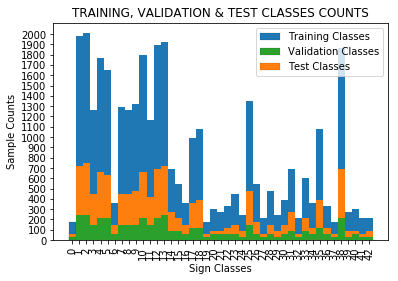


=========================== TRAINING CLASSES ===========================
Class 0: Count = 180
Class Index [1st Occurrence]:  9960
Class Label:  0
Class Visualization [1st Occurrence]: 


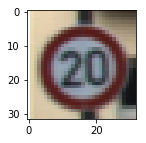


Class 1: Count = 1980
Class Index [1st Occurrence]:  2220
Class Label:  1
Class Visualization [1st Occurrence]: 


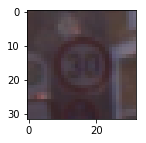


Class 2: Count = 2010
Class Index [1st Occurrence]:  31439
Class Label:  2
Class Visualization [1st Occurrence]: 


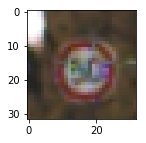


Class 3: Count = 1260
Class Index [1st Occurrence]:  5370
Class Label:  3
Class Visualization [1st Occurrence]: 


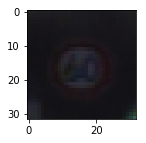


Class 4: Count = 1770
Class Index [1st Occurrence]:  6810
Class Label:  4
Class Visualization [1st Occurrence]: 


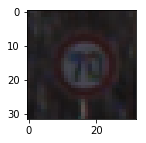


Class 5: Count = 1650
Class Index [1st Occurrence]:  12360
Class Label:  5
Class Visualization [1st Occurrence]: 


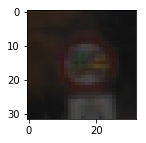


Class 6: Count = 360
Class Index [1st Occurrence]:  21450
Class Label:  6
Class Visualization [1st Occurrence]: 


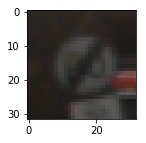


Class 7: Count = 1290
Class Index [1st Occurrence]:  23730
Class Label:  7
Class Visualization [1st Occurrence]: 


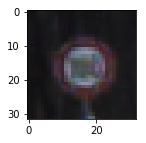


Class 8: Count = 1260
Class Index [1st Occurrence]:  15870
Class Label:  8
Class Visualization [1st Occurrence]: 


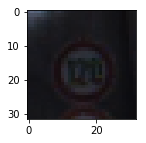


Class 9: Count = 1320
Class Index [1st Occurrence]:  11040
Class Label:  9
Class Visualization [1st Occurrence]: 


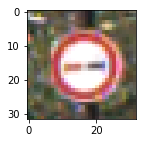


Class 10: Count = 1800
Class Index [1st Occurrence]:  17130
Class Label:  10
Class Visualization [1st Occurrence]: 


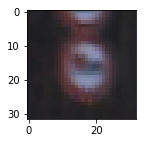


Class 11: Count = 1170
Class Index [1st Occurrence]:  8580
Class Label:  11
Class Visualization [1st Occurrence]: 


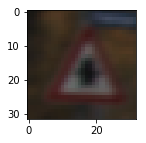


Class 12: Count = 1890
Class Index [1st Occurrence]:  27329
Class Label:  12
Class Visualization [1st Occurrence]: 


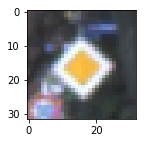


Class 13: Count = 1920
Class Index [1st Occurrence]:  21810
Class Label:  13
Class Visualization [1st Occurrence]: 


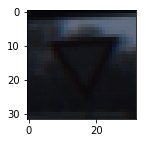


Class 14: Count = 690
Class Index [1st Occurrence]:  29219
Class Label:  14
Class Visualization [1st Occurrence]: 


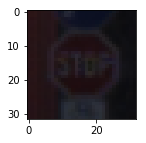


Class 15: Count = 540
Class Index [1st Occurrence]:  29909
Class Label:  15
Class Visualization [1st Occurrence]: 


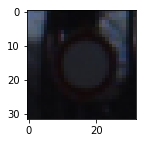


Class 16: Count = 360
Class Index [1st Occurrence]:  5010
Class Label:  16
Class Visualization [1st Occurrence]: 


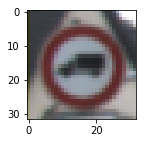


Class 17: Count = 990
Class Index [1st Occurrence]:  30449
Class Label:  17
Class Visualization [1st Occurrence]: 


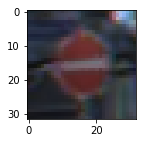


Class 18: Count = 1080
Class Index [1st Occurrence]:  20370
Class Label:  18
Class Visualization [1st Occurrence]: 


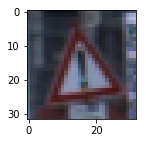


Class 19: Count = 180
Class Index [1st Occurrence]:  6630
Class Label:  19
Class Visualization [1st Occurrence]: 


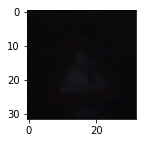


Class 20: Count = 300
Class Index [1st Occurrence]:  25950
Class Label:  20
Class Visualization [1st Occurrence]: 


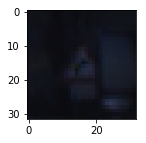


Class 21: Count = 270
Class Index [1st Occurrence]:  25680
Class Label:  21
Class Visualization [1st Occurrence]: 


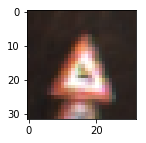


Class 22: Count = 330
Class Index [1st Occurrence]:  4500
Class Label:  22
Class Visualization [1st Occurrence]: 


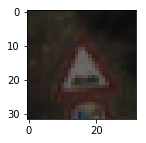


Class 23: Count = 450
Class Index [1st Occurrence]:  1770
Class Label:  23
Class Visualization [1st Occurrence]: 


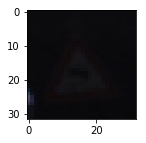


Class 24: Count = 240
Class Index [1st Occurrence]:  10800
Class Label:  24
Class Visualization [1st Occurrence]: 


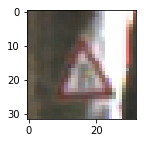


Class 25: Count = 1350
Class Index [1st Occurrence]:  33449
Class Label:  25
Class Visualization [1st Occurrence]: 


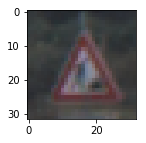


Class 26: Count = 540
Class Index [1st Occurrence]:  1230
Class Label:  26
Class Visualization [1st Occurrence]: 


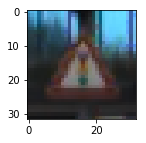


Class 27: Count = 210
Class Index [1st Occurrence]:  10350
Class Label:  27
Class Visualization [1st Occurrence]: 


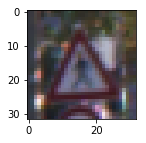


Class 28: Count = 480
Class Index [1st Occurrence]:  26849
Class Label:  28
Class Visualization [1st Occurrence]: 


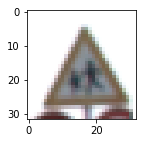


Class 29: Count = 240
Class Index [1st Occurrence]:  10560
Class Label:  29
Class Visualization [1st Occurrence]: 


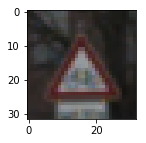


Class 30: Count = 390
Class Index [1st Occurrence]:  25020
Class Label:  30
Class Visualization [1st Occurrence]: 


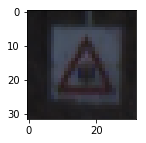


Class 31: Count = 690
Class Index [1st Occurrence]:  210
Class Label:  31
Class Visualization [1st Occurrence]: 


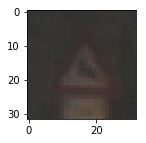


Class 32: Count = 210
Class Index [1st Occurrence]:  10140
Class Label:  32
Class Visualization [1st Occurrence]: 


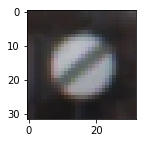


Class 33: Count = 599
Class Index [1st Occurrence]:  26250
Class Label:  33
Class Visualization [1st Occurrence]: 


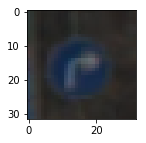


Class 34: Count = 360
Class Index [1st Occurrence]:  20010
Class Label:  34
Class Visualization [1st Occurrence]: 


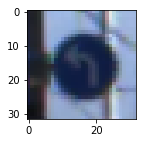


Class 35: Count = 1080
Class Index [1st Occurrence]:  18930
Class Label:  35
Class Visualization [1st Occurrence]: 


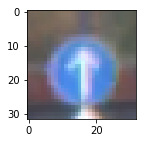


Class 36: Count = 330
Class Index [1st Occurrence]:  900
Class Label:  36
Class Visualization [1st Occurrence]: 


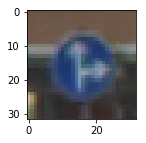


Class 37: Count = 180
Class Index [1st Occurrence]:  4830
Class Label:  37
Class Visualization [1st Occurrence]: 


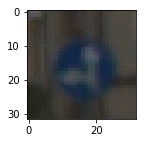


Class 38: Count = 1860
Class Index [1st Occurrence]:  14010
Class Label:  38
Class Visualization [1st Occurrence]: 


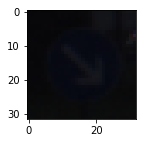


Class 39: Count = 270
Class Index [1st Occurrence]:  25410
Class Label:  39
Class Visualization [1st Occurrence]: 


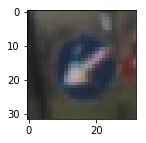


Class 40: Count = 300
Class Index [1st Occurrence]:  4200
Class Label:  40
Class Visualization [1st Occurrence]: 


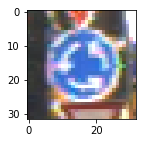


Class 41: Count = 210
Class Index [1st Occurrence]:  0
Class Label:  41
Class Visualization [1st Occurrence]: 


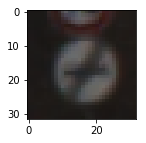


Class 42: Count = 210
Class Index [1st Occurrence]:  9750
Class Label:  42
Class Visualization [1st Occurrence]: 


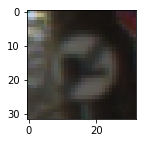


=========================== VALIDATION CLASSES ===========================
Class 0: Count = 30
Class Index [1st Occurrence]:  1320
Class Label:  0
Class Visualization [1st Occurrence]: 


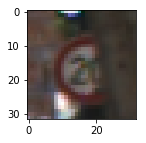


Class 1: Count = 240
Class Index [1st Occurrence]:  300
Class Label:  1
Class Visualization [1st Occurrence]: 


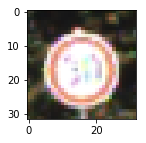


Class 2: Count = 240
Class Index [1st Occurrence]:  4020
Class Label:  2
Class Visualization [1st Occurrence]: 


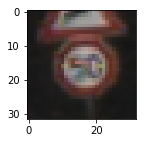


Class 3: Count = 150
Class Index [1st Occurrence]:  750
Class Label:  3
Class Visualization [1st Occurrence]: 


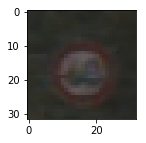


Class 4: Count = 210
Class Index [1st Occurrence]:  930
Class Label:  4
Class Visualization [1st Occurrence]: 


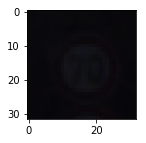


Class 5: Count = 210
Class Index [1st Occurrence]:  1620
Class Label:  5
Class Visualization [1st Occurrence]: 


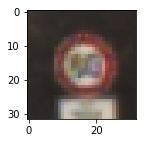


Class 6: Count = 60
Class Index [1st Occurrence]:  2700
Class Label:  6
Class Visualization [1st Occurrence]: 


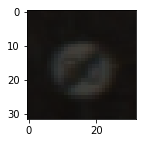


Class 7: Count = 150
Class Index [1st Occurrence]:  3000
Class Label:  7
Class Visualization [1st Occurrence]: 


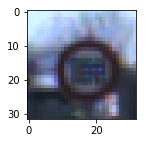


Class 8: Count = 150
Class Index [1st Occurrence]:  2040
Class Label:  8
Class Visualization [1st Occurrence]: 


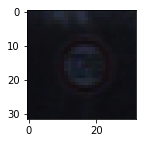


Class 9: Count = 150
Class Index [1st Occurrence]:  1470
Class Label:  9
Class Visualization [1st Occurrence]: 


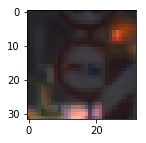


Class 10: Count = 210
Class Index [1st Occurrence]:  2190
Class Label:  10
Class Visualization [1st Occurrence]: 


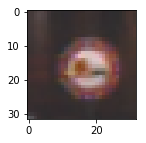


Class 11: Count = 150
Class Index [1st Occurrence]:  1140
Class Label:  11
Class Visualization [1st Occurrence]: 


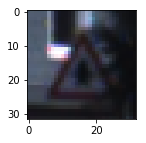


Class 12: Count = 210
Class Index [1st Occurrence]:  3510
Class Label:  12
Class Visualization [1st Occurrence]: 


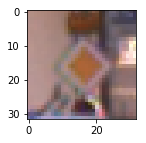


Class 13: Count = 240
Class Index [1st Occurrence]:  2760
Class Label:  13
Class Visualization [1st Occurrence]: 


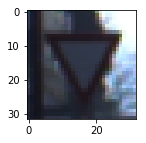


Class 14: Count = 90
Class Index [1st Occurrence]:  3720
Class Label:  14
Class Visualization [1st Occurrence]: 


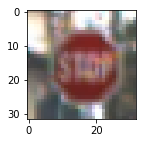


Class 15: Count = 90
Class Index [1st Occurrence]:  3810
Class Label:  15
Class Visualization [1st Occurrence]: 


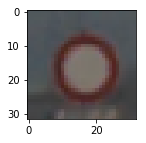


Class 16: Count = 60
Class Index [1st Occurrence]:  690
Class Label:  16
Class Visualization [1st Occurrence]: 


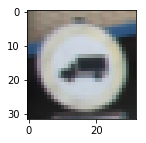


Class 17: Count = 120
Class Index [1st Occurrence]:  3900
Class Label:  17
Class Visualization [1st Occurrence]: 


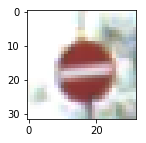


Class 18: Count = 120
Class Index [1st Occurrence]:  2580
Class Label:  18
Class Visualization [1st Occurrence]: 


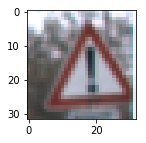


Class 19: Count = 30
Class Index [1st Occurrence]:  900
Class Label:  19
Class Visualization [1st Occurrence]: 


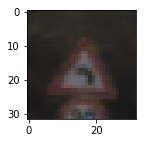


Class 20: Count = 60
Class Index [1st Occurrence]:  3300
Class Label:  20
Class Visualization [1st Occurrence]: 


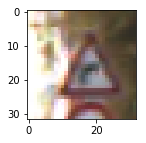


Class 21: Count = 60
Class Index [1st Occurrence]:  3240
Class Label:  21
Class Visualization [1st Occurrence]: 


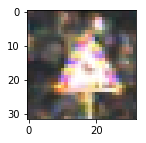


Class 22: Count = 60
Class Index [1st Occurrence]:  600
Class Label:  22
Class Visualization [1st Occurrence]: 


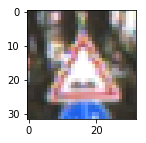


Class 23: Count = 60
Class Index [1st Occurrence]:  240
Class Label:  23
Class Visualization [1st Occurrence]: 


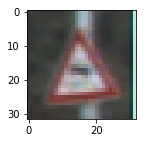


Class 24: Count = 30
Class Index [1st Occurrence]:  1440
Class Label:  24
Class Visualization [1st Occurrence]: 


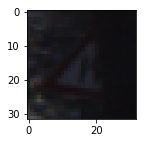


Class 25: Count = 150
Class Index [1st Occurrence]:  4260
Class Label:  25
Class Visualization [1st Occurrence]: 


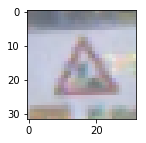


Class 26: Count = 60
Class Index [1st Occurrence]:  180
Class Label:  26
Class Visualization [1st Occurrence]: 


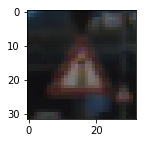


Class 27: Count = 30
Class Index [1st Occurrence]:  1380
Class Label:  27
Class Visualization [1st Occurrence]: 


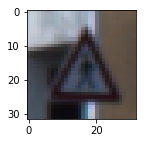


Class 28: Count = 60
Class Index [1st Occurrence]:  3450
Class Label:  28
Class Visualization [1st Occurrence]: 


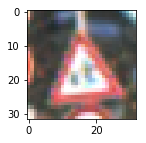


Class 29: Count = 30
Class Index [1st Occurrence]:  1410
Class Label:  29
Class Visualization [1st Occurrence]: 


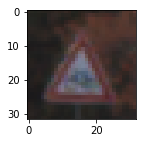


Class 30: Count = 60
Class Index [1st Occurrence]:  3150
Class Label:  30
Class Visualization [1st Occurrence]: 


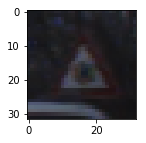


Class 31: Count = 90
Class Index [1st Occurrence]:  30
Class Label:  31
Class Visualization [1st Occurrence]: 


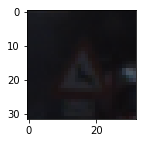


Class 32: Count = 30
Class Index [1st Occurrence]:  1350
Class Label:  32
Class Visualization [1st Occurrence]: 


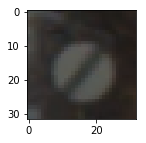


Class 33: Count = 90
Class Index [1st Occurrence]:  3360
Class Label:  33
Class Visualization [1st Occurrence]: 


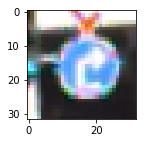


Class 34: Count = 60
Class Index [1st Occurrence]:  2520
Class Label:  34
Class Visualization [1st Occurrence]: 


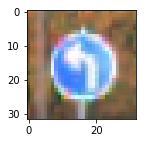


Class 35: Count = 120
Class Index [1st Occurrence]:  2400
Class Label:  35
Class Visualization [1st Occurrence]: 


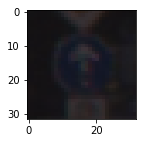


Class 36: Count = 60
Class Index [1st Occurrence]:  120
Class Label:  36
Class Visualization [1st Occurrence]: 


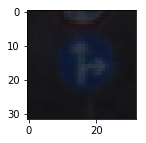


Class 37: Count = 30
Class Index [1st Occurrence]:  660
Class Label:  37
Class Visualization [1st Occurrence]: 


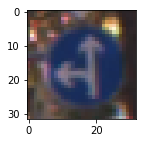


Class 38: Count = 210
Class Index [1st Occurrence]:  1830
Class Label:  38
Class Visualization [1st Occurrence]: 


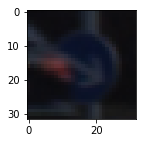


Class 39: Count = 30
Class Index [1st Occurrence]:  3210
Class Label:  39
Class Visualization [1st Occurrence]: 


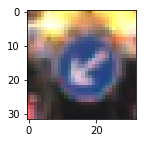


Class 40: Count = 60
Class Index [1st Occurrence]:  540
Class Label:  40
Class Visualization [1st Occurrence]: 


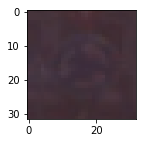


Class 41: Count = 30
Class Index [1st Occurrence]:  0
Class Label:  41
Class Visualization [1st Occurrence]: 


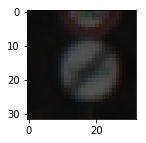


Class 42: Count = 30
Class Index [1st Occurrence]:  1290
Class Label:  42
Class Visualization [1st Occurrence]: 


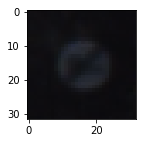


=========================== TEST CLASSES ===========================
Class 0: Count = 60
Class Index [1st Occurrence]:  243
Class Label:  0
Class Visualization [1st Occurrence]: 


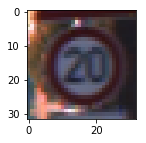


Class 1: Count = 720
Class Index [1st Occurrence]:  1
Class Label:  1
Class Visualization [1st Occurrence]: 


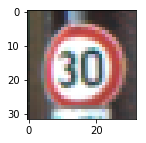


Class 2: Count = 750
Class Index [1st Occurrence]:  34
Class Label:  2
Class Visualization [1st Occurrence]: 


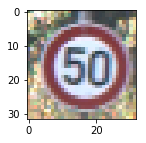


Class 3: Count = 450
Class Index [1st Occurrence]:  23
Class Label:  3
Class Visualization [1st Occurrence]: 


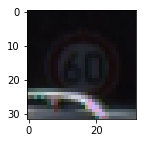


Class 4: Count = 660
Class Index [1st Occurrence]:  14
Class Label:  4
Class Visualization [1st Occurrence]: 


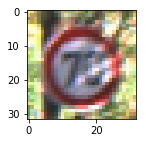


Class 5: Count = 630
Class Index [1st Occurrence]:  30
Class Label:  5
Class Visualization [1st Occurrence]: 


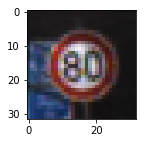


Class 6: Count = 150
Class Index [1st Occurrence]:  129
Class Label:  6
Class Visualization [1st Occurrence]: 


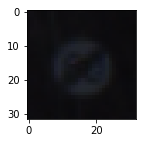


Class 7: Count = 450
Class Index [1st Occurrence]:  11
Class Label:  7
Class Visualization [1st Occurrence]: 


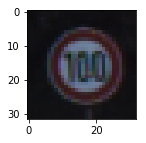


Class 8: Count = 450
Class Index [1st Occurrence]:  39
Class Label:  8
Class Visualization [1st Occurrence]: 


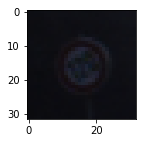


Class 9: Count = 480
Class Index [1st Occurrence]:  15
Class Label:  9
Class Visualization [1st Occurrence]: 


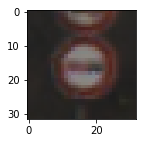


Class 10: Count = 660
Class Index [1st Occurrence]:  27
Class Label:  10
Class Visualization [1st Occurrence]: 


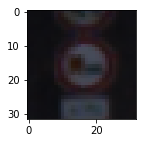


Class 11: Count = 420
Class Index [1st Occurrence]:  4
Class Label:  11
Class Visualization [1st Occurrence]: 


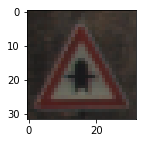


Class 12: Count = 690
Class Index [1st Occurrence]:  7
Class Label:  12
Class Visualization [1st Occurrence]: 


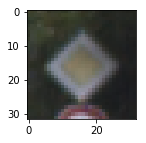


Class 13: Count = 720
Class Index [1st Occurrence]:  26
Class Label:  13
Class Visualization [1st Occurrence]: 


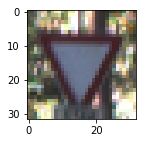


Class 14: Count = 270
Class Index [1st Occurrence]:  93
Class Label:  14
Class Visualization [1st Occurrence]: 


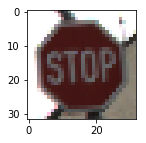


Class 15: Count = 210
Class Index [1st Occurrence]:  52
Class Label:  15
Class Visualization [1st Occurrence]: 


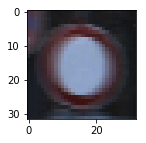


Class 16: Count = 150
Class Index [1st Occurrence]:  0
Class Label:  16
Class Visualization [1st Occurrence]: 


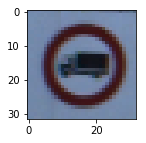


Class 17: Count = 360
Class Index [1st Occurrence]:  31
Class Label:  17
Class Visualization [1st Occurrence]: 


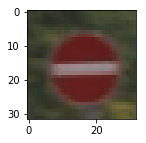


Class 18: Count = 390
Class Index [1st Occurrence]:  6
Class Label:  18
Class Visualization [1st Occurrence]: 


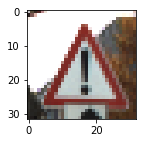


Class 19: Count = 60
Class Index [1st Occurrence]:  235
Class Label:  19
Class Visualization [1st Occurrence]: 


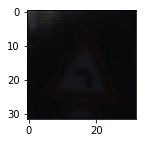


Class 20: Count = 90
Class Index [1st Occurrence]:  17
Class Label:  20
Class Visualization [1st Occurrence]: 


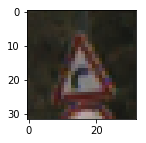


Class 21: Count = 90
Class Index [1st Occurrence]:  16
Class Label:  21
Class Visualization [1st Occurrence]: 


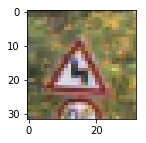


Class 22: Count = 120
Class Index [1st Occurrence]:  88
Class Label:  22
Class Visualization [1st Occurrence]: 


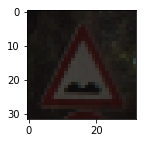


Class 23: Count = 150
Class Index [1st Occurrence]:  12
Class Label:  23
Class Visualization [1st Occurrence]: 


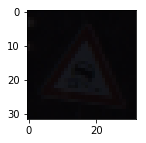


Class 24: Count = 90
Class Index [1st Occurrence]:  44
Class Label:  24
Class Visualization [1st Occurrence]: 


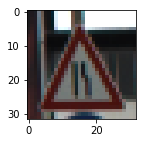


Class 25: Count = 480
Class Index [1st Occurrence]:  8
Class Label:  25
Class Visualization [1st Occurrence]: 


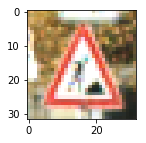


Class 26: Count = 180
Class Index [1st Occurrence]:  57
Class Label:  26
Class Visualization [1st Occurrence]: 


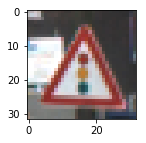


Class 27: Count = 60
Class Index [1st Occurrence]:  18
Class Label:  27
Class Visualization [1st Occurrence]: 


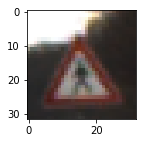


Class 28: Count = 150
Class Index [1st Occurrence]:  69
Class Label:  28
Class Visualization [1st Occurrence]: 


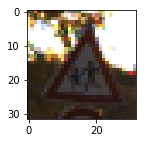


Class 29: Count = 90
Class Index [1st Occurrence]:  117
Class Label:  29
Class Visualization [1st Occurrence]: 


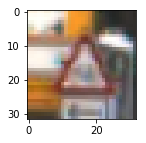


Class 30: Count = 150
Class Index [1st Occurrence]:  41
Class Label:  30
Class Visualization [1st Occurrence]: 


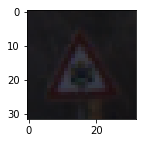


Class 31: Count = 270
Class Index [1st Occurrence]:  194
Class Label:  31
Class Visualization [1st Occurrence]: 


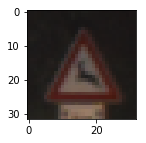


Class 32: Count = 60
Class Index [1st Occurrence]:  95
Class Label:  32
Class Visualization [1st Occurrence]: 


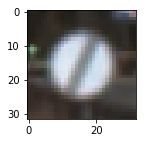


Class 33: Count = 210
Class Index [1st Occurrence]:  3
Class Label:  33
Class Visualization [1st Occurrence]: 


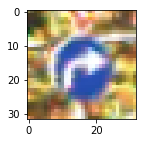


Class 34: Count = 120
Class Index [1st Occurrence]:  32
Class Label:  34
Class Visualization [1st Occurrence]: 


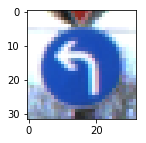


Class 35: Count = 390
Class Index [1st Occurrence]:  9
Class Label:  35
Class Visualization [1st Occurrence]: 


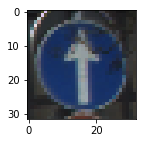


Class 36: Count = 120
Class Index [1st Occurrence]:  130
Class Label:  36
Class Visualization [1st Occurrence]: 


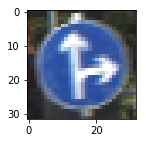


Class 37: Count = 60
Class Index [1st Occurrence]:  830
Class Label:  37
Class Visualization [1st Occurrence]: 


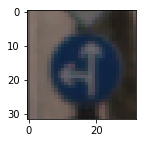


Class 38: Count = 690
Class Index [1st Occurrence]:  2
Class Label:  38
Class Visualization [1st Occurrence]: 


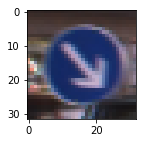


Class 39: Count = 90
Class Index [1st Occurrence]:  277
Class Label:  39
Class Visualization [1st Occurrence]: 


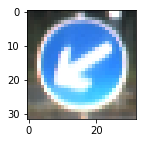


Class 40: Count = 90
Class Index [1st Occurrence]:  137
Class Label:  40
Class Visualization [1st Occurrence]: 


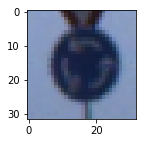


Class 41: Count = 60
Class Index [1st Occurrence]:  140
Class Label:  41
Class Visualization [1st Occurrence]: 


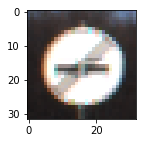


Class 42: Count = 90
Class Index [1st Occurrence]:  315
Class Label:  42
Class Visualization [1st Occurrence]: 


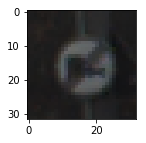

In [3]:
### Data Exploration Visualization Code goes here.
### Feel free to use as many code cells as needed.
### NMK [2018-09-13]: Done.

import matplotlib.pyplot as plt
# Visualizations will be shown in the Notebook.
%matplotlib inline

trn_unique_classes, trn_classes_indices, trn_classes_counts = np.unique(np.array(y_train), return_index=True, return_counts=True)
val_unique_classes, val_classes_indices, val_classes_counts = np.unique(np.array(y_valid), return_index=True, return_counts=True)
tst_unique_classes, tst_classes_indices, tst_classes_counts = np.unique(np.array(y_test),  return_index=True, return_counts=True)

print("=========================================================================")
print("=========================== DATA SETS SUMMARY ===========================")
print("=========================================================================")
for class_i in trn_unique_classes:
    print("Class {}: Training Count = {}, Validation Count = {}, Test Count = {}".format(
        class_i, trn_classes_counts[class_i], val_classes_counts[class_i], tst_classes_counts[class_i]))
print()
plot_indx_x = trn_unique_classes
plot_bar_width = 1
edgecolor      = 'black'
linewidth      = 0.1
plot1_trn = plt.bar(plot_indx_x, trn_classes_counts, plot_bar_width, bottom=0, edgecolor=edgecolor, linewidth=linewidth)
plot2_tst = plt.bar(plot_indx_x, tst_classes_counts, plot_bar_width, bottom=0, edgecolor=edgecolor, linewidth=linewidth)
plot3_val = plt.bar(plot_indx_x, val_classes_counts, plot_bar_width, bottom=0, edgecolor=edgecolor, linewidth=linewidth)
plt.title('TRAINING, VALIDATION & TEST CLASSES COUNTS')
plt.xlabel('Sign Classes')
plt.ylabel('Sample Counts')
# plt.xticks(trn_unique_classes)
plot_indx_x_max = np.max(trn_unique_classes)
plt.xticks(np.arange(0, plot_indx_x_max+1, 1), rotation=90)
plot_indx_y_max = np.max(trn_classes_counts)
plt.yticks(np.arange(0, plot_indx_y_max, 100))
plt.legend( (plot1_trn[0], plot3_val[0], plot2_tst[0]), ('Training Classes', 'Validation Classes', 'Test Classes') )
plt.show()
print()

### Print Each Sign Class, Corresponding Count, Sample Index & Visualization.
print("========================================================================")
print("=========================== TRAINING CLASSES ===========================")
print("========================================================================")
for class_i in trn_unique_classes:
    print("Class {}: Count = {}".format(class_i, trn_classes_counts[class_i]))
    class_index = trn_classes_indices[class_i]
    print("Class Index [1st Occurrence]: ", class_index)
    print("Class Label: ", y_train[class_index])
    print("Class Visualization [1st Occurrence]: ")
    image = X_train[class_index]
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.show()
    print()

print("==========================================================================")
print("=========================== VALIDATION CLASSES ===========================")
print("==========================================================================")
for class_i in val_unique_classes:
    print("Class {}: Count = {}".format(class_i, val_classes_counts[class_i]))
    class_index = val_classes_indices[class_i]
    print("Class Index [1st Occurrence]: ", class_index)
    print("Class Label: ", y_valid[class_index])
    print("Class Visualization [1st Occurrence]: ")
    image = X_valid[class_index]
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.show()
    print()

print("====================================================================")
print("=========================== TEST CLASSES ===========================")
print("====================================================================")
for class_i in tst_unique_classes:
    print("Class {}: Count = {}".format(class_i, tst_classes_counts[class_i]))
    class_index = tst_classes_indices[class_i]
    print("Class Index [1st Occurrence]: ", class_index)
    print("Class Label: ", y_test[class_index])
    print("Class Visualization [1st Occurrence]: ")
    image = X_test[class_index]
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.show()
    print()


----

## Step 2: Design and Test a Model Architecture

Design and Implement a Deep Learning Model that learns to recognize Traffic Signs. Train and Test your Model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-Process the Data Set (Normalization, Grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Pre-Process the Data here. It is required to Normalize the Data.
### Other Pre-Processing Steps could include Converting To Grayscale, etc.
### Feel free to use as many code cells as needed.
### NMK [2018-09-13]: Done.

### Quick Normalization:
def QuickNormalize(Xin, Xmax):
    Xout = (Xin - np.ceil(Xmax/2)) / np.ceil(Xmax/2)
    return(Xout)

# For Color Image:
Xmin = 0
Xmax = 255

X_train = QuickNormalize(X_train, Xmax)
X_valid = QuickNormalize(X_valid, Xmax)
X_test  = QuickNormalize(X_test , Xmax)

# print(X_train[0].shape)
# print(X_train[0])


### Model Architecture

In [5]:
### Define your Model Architecture here.
### Feel free to use as many code cells as needed.
### NMK [2018-09-13]: Done.


In [6]:
### Setup TensorFlow:
import tensorflow as tf


In [7]:
##########################################################################################
### LeNet-5 Based TRAFFIC SIGN CLASSIFIER MODEL:
# Refer: [LeNet-5](http://yann.lecun.com/exdb/lenet/) Neural Network Architecture.
##########################################################################################
# 
# ### Input
# The LeNet Architecture accepts a 32x32xC Image as Input,
# where C is the Number of Color Channels.
# The German Traffic Signs Dataset has Images with C=3 [R,G,B].
# => Input Image Shape: 32x32x3.
# 
# ### Architecture
# **Layer 1: Convolutional.** Output Shape: 28x28x6.
# **Activation.** Activation Function Used: ReLU.
# **Pooling.** Output Shape: 14x14x6.
# 
# **Layer 2: Convolutional.** Output Shape: 10x10x16.
# **Activation.** Activation Function Used: ReLU.
# **Pooling.** Output Shape: 5x5x16.
# 
# **Flatten.** Flatten the Output Shape of the Final Pooling Layer
# such that it is 1D instead of 3D.
# The easiest way to do is by using `tf.contrib.layers.flatten`.
# 
# **Layer 3: Fully Connected.** 120 Outputs.
# **Activation.** Activation Function Used: ReLU.
# 
# **Layer 4: Fully Connected.** 84 Outputs.
# **Activation.** Activation Function Used: ReLU.
# 
# **Layer 5: Fully Connected (Logits).** 43 Outputs, = Number of Traffic Sign Classes.
# 
# ### Output
# Return the Final Result from Layer 5.

### NMK [2018-09-13]: Convolution & Pooling Formulae:
### Convolution -- Actual [padding = 'SAME']:
###    H_Out_Conv = ((H-F + 2P) / S) + 1
###    W_Out_Conv = ((W−F + 2P) / S) + 1
###    D_Out_Conv = K
### Convolution -- Actual [padding = 'VALID']:
###    H_Out_Conv = ((H-F) / S) + 1
###    W_Out_Conv = ((W−F) / S) + 1
###    D_Out_Conv = K
### Convolution -- TensorFlow [padding = 'SAME']:
###    H_Out_TFConv = ceil(float(in_height) / float(strides[1]))
###    W_Out_TFConv = ceil(float(in_width) / float(strides[2]))
###    D_Out_TFConv = K
### Convolution -- TensorFlow [padding = 'VALID']:
###    H_Out_TFConv = ceil(float(in_height - filter_height + 1) / float(strides[1]))
###    W_Out_TFConv = ceil(float(in_width - filter_width + 1) / float(strides[2]))
###    D_Out_TFConv = K
### Pooling:
###    H_Out_Pooling = (input_height - filter_height)/S + 1
###    W_Out_Pooling = (input_width - filter_width)/S + 1
###    D_Out_Pooling = K

from tensorflow.contrib.layers import flatten

# Arguments Used For tf.truncated_normal(), Randomly Defines Variables For the Weights and Biases For Each Layer
mu    = 0
sigma = 0.1

Weights = {
    'WConv1'    : tf.Variable(tf.truncated_normal(shape=(5, 5, 3,  6), mean = mu, stddev = sigma)), # Input = 32 x 32 x  3. Output = 28 x 28 x  6. strides=1. padding='VALID'.
    'WConv2'    : tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)), # Input = 14 x 14 x  6. Output = 10 x 10 x 16. strides=1. padding='VALID'.
    'WFullConn1': tf.Variable(tf.truncated_normal(shape=(400, 120),    mean = mu, stddev = sigma)), # Input =  5 x  5 x 16 = 400. Output = 120.
    'WFullConn2': tf.Variable(tf.truncated_normal(shape=(120,  84),    mean = mu, stddev = sigma)), # Input = 120. Output = 84.
    'WLeNetOut' : tf.Variable(tf.truncated_normal(shape=( 84,  43),    mean = mu, stddev = sigma))  # Input =  84. Output = 43.
}

biases = {
    'bConv1'    : tf.Variable(tf.zeros(  6)), # Output = 28 x 28 x  6.
    'bConv2'    : tf.Variable(tf.zeros( 16)), # Output = 10 x 10 x 16.
    'bFullConn1': tf.Variable(tf.zeros(120)), # Output = 120.
    'bFullConn2': tf.Variable(tf.zeros( 84)), # Output =  84.
    'bLeNetOut' : tf.Variable(tf.zeros( 43))  # Output =  43.
}

def Conv2d(X, W, b, strides, padding):
    X = tf.nn.conv2d(X, W, strides=[1, strides, strides, 1], padding=padding)
    X = tf.nn.bias_add(X, b)
    return(X)

def MaxPool2d(X, k, padding):
    X = tf.nn.max_pool(X, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)
    return(X)

def LeNet5(X):
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    LeNet5.Conv1 = Conv2d(X, Weights['WConv1'], biases['bConv1'], strides=1, padding='VALID')
    # Activation.
    LeNet5.Out1 = tf.nn.relu(LeNet5.Conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    LeNet5.Pool1 = MaxPool2d(LeNet5.Out1, k=2, padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    LeNet5.Conv2 = Conv2d(LeNet5.Pool1, Weights['WConv2'], biases['bConv2'], strides=1, padding='VALID')
    # Activation.
    LeNet5.Out2 = tf.nn.relu(LeNet5.Conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    LeNet5.Pool2 = MaxPool2d(LeNet5.Out2, k=2, padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    LeNet5.Flat2 = flatten(LeNet5.Pool2) # tf.contrib.layers.flatten()
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    LeNet5.FullConn1 = tf.add( tf.matmul(LeNet5.Flat2, Weights['WFullConn1']), biases['bFullConn1'] )
    # Activation.
    LeNet5.Out3 = tf.nn.relu(LeNet5.FullConn1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    LeNet5.FullConn2 = tf.add( tf.matmul(LeNet5.Out3, Weights['WFullConn2']), biases['bFullConn2'] )
    # Activation.
    LeNet5.Out4 = tf.nn.relu(LeNet5.FullConn2)
    # Dropout - To Reduce Overfitting & Improve Model Accuracy.
    LeNet5.Out4_after_dropout = tf.nn.dropout(LeNet5.Out4, keep_probability)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    LeNet5.LeNetOut = tf.add( tf.matmul(LeNet5.Out4_after_dropout, Weights['WLeNetOut']), biases['bLeNetOut'] )
    LeNet5.logits = LeNet5.LeNetOut
    
    return LeNet5.logits

print("LeNet-5 Based TRAFFIC SIGN CLASSIFIER MODEL Created.")


LeNet-5 Based TRAFFIC SIGN CLASSIFIER MODEL Created.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your Model here.
### Calculate and report the Accuracy on the Training and Validation Set.
### Once a Final Model Architecture is selected,
### the Accuracy on the Test Set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
### NMK [2018-09-13]: Done.


In [9]:
### Train LeNet to Classify Traffic Sign Images
### [German Traffic Signs](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)

### Features and Labels:
# `X` is a Placeholder for a Batch of Input Images.
# `y` is a Placeholder for a Batch of Output Labels.
X = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

# Construct to One Hot Encode the Labels so as to use for the Model.
one_hot_y = tf.one_hot(y, 43)

### For Dropout -- Keep Probability:
keep_probability = tf.placeholder(tf.float32) # Probability To Keep Units.


In [10]:
### Prepare Data For Input To Model:
# -> Shuffle.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [11]:
### The `EPOCH` and `BATCH_SIZE` Values affect the Model Accuracy and Training Speed.
EPOCHS     = 100
BATCH_SIZE = 128


In [12]:
##########################################################################################
### MODEL TRAINING PIPELINE CONSTRUCT
##########################################################################################
# Model Training Pipeline that Trains the Model To Classify Traffic Signs.
learn_rate = 0.001 # Model's Learning Rate.

logits             = LeNet5(X)
cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_of_operation  = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = learn_rate)
training_operation = optimizer.minimize(loss_of_operation)

print("MODEL TRAINING PIPELINE Created.")


MODEL TRAINING PIPELINE Created.


In [13]:
##########################################################################################
### PREDICTION/CLASSIFICATION PIPELINE CONSTRUCT
##########################################################################################
# Prediction/Classification Pipeline that uses the Model to Classify Traffic Signs.
logits             = LeNet5(X)
prediction         = tf.argmax(logits, 1)
prediction_softmax = tf.nn.softmax(logits)

keep_prob_predict  = 1.0 # Dropout -- Keep Probability For Prediction.

def Prediction(X_data):
    sess = tf.get_default_session()
    prediction_out, prediction_softmax_out = sess.run([prediction, prediction_softmax],
                                                      feed_dict={X: X_data, keep_probability: keep_prob_predict})
    return prediction_out, prediction_softmax_out

print("PREDICTION/CLASSIFICATION PIPELINE Created.")


PREDICTION/CLASSIFICATION PIPELINE Created.


In [14]:
##########################################################################################
### MODEL EVALUATION FUNCTION CONSTRUCT
##########################################################################################
# Evaluate how well the Model's Loss and Accuracy are For a given Dataset.
prediction_correctness = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_of_operation  = tf.reduce_mean(tf.cast(prediction_correctness, tf.float32))

keep_prob_eval = 1.0 # Dropout -- Keep Probability For Model Evaluation.

def Evaluate(X_data, y_data):
    num_examples   = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy         = sess.run(accuracy_of_operation, feed_dict={X: batch_x, y: batch_y, keep_probability: keep_prob_eval})
        total_accuracy  += (accuracy * len(batch_x))
    
    avg_accuracy = total_accuracy / num_examples
    return avg_accuracy

print("MODEL EVALUATION FUNCTION Created.")


MODEL EVALUATION FUNCTION Created.



Training the Model...

EPOCH 1 ...:
Validation Accuracy = 0.745

EPOCH 2 ...:
Validation Accuracy = 0.847

EPOCH 3 ...:
Validation Accuracy = 0.863

EPOCH 4 ...:
Validation Accuracy = 0.890

EPOCH 5 ...:
Validation Accuracy = 0.904

EPOCH 6 ...:
Validation Accuracy = 0.917

EPOCH 7 ...:
Validation Accuracy = 0.922

EPOCH 8 ...:
Validation Accuracy = 0.923

EPOCH 9 ...:
Validation Accuracy = 0.928

EPOCH 10 ...:
Validation Accuracy = 0.936

EPOCH 11 ...:
Validation Accuracy = 0.945

EPOCH 12 ...:
Validation Accuracy = 0.929

EPOCH 13 ...:
Validation Accuracy = 0.936

EPOCH 14 ...:
Validation Accuracy = 0.941

EPOCH 15 ...:
Validation Accuracy = 0.942

EPOCH 16 ...:
Validation Accuracy = 0.946

EPOCH 17 ...:
Validation Accuracy = 0.948

EPOCH 18 ...:
Validation Accuracy = 0.946

EPOCH 19 ...:
Validation Accuracy = 0.954

EPOCH 20 ...:
Validation Accuracy = 0.948

EPOCH 21 ...:
Validation Accuracy = 0.957

EPOCH 22 ...:
Validation Accuracy = 0.950

EPOCH 23 ...:
Validation Accuracy = 0.9

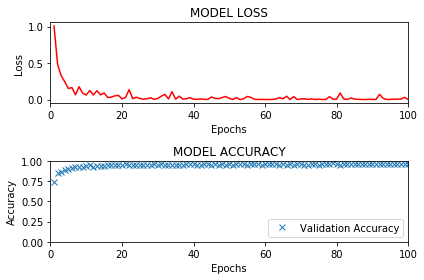

In [15]:
##########################################################################################
### FINALLY! - TRAIN THE MODEL
##########################################################################################
# -> Run the Training Dataset through the Training Pipeline to Train the Model.
# -> Before Each EPOCH, Shuffle the Training Set
#    so that the Model is Not Biased By the Order Of Data.
# -> After Each EPOCH, Measure the Loss and Accuracy for the Validation Dataset.
# -> Save the Model After Training.

keep_prob_train = 0.5 # Dropout -- Keep Probability For Model Training.
loss_EPOCHS     = []  # For Plotting.
accu_EPOCHS     = []  # For Plotting.
saver           = tf.train.Saver() # For Saving Model.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train)
    
    print()
    print("Training the Model...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            ### Run Training Operation (Optimizer) For Each Batch:
            sess.run(training_operation, feed_dict={X: batch_x, y: batch_y, keep_probability: keep_prob_train})
        
        ### Get Loss & Validation Accuracy For Each EPOCH:
        # Get Loss For the EPOCH by passing Last Batch in the EPOCH.
        loss = sess.run(loss_of_operation, feed_dict={X: batch_x, y: batch_y, keep_probability: keep_prob_train})
        loss_EPOCHS.append(loss)
        # Get Validation Accuracy For the EPOCH For the Validation Dataset.
        validation_accuracy = Evaluate(X_valid, y_valid)
        accu_EPOCHS.append(validation_accuracy)
        print("EPOCH {} ...:".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, './LeNet5_Model')
    print("Model Saved!")

### Plot EPOCHS Vs. Loss, Validation Accuracy:
x_indices = np.arange(EPOCHS)

plot_loss = plt.subplot(211)
plot_loss.set_title('MODEL LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plot_loss.plot(x_indices+1, loss_EPOCHS, 'r')
plot_loss.set_xlim([x_indices[0], x_indices[-1]+1])

plot_accu = plt.subplot(212)
plot_accu.set_title('MODEL ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plot_accu.plot(x_indices+1, accu_EPOCHS, 'x', label='Validation Accuracy')
plot_accu.set_xlim([x_indices[0], x_indices[-1]+1])
plot_accu.set_ylim([0, 1.0])
plot_accu.legend(loc=4)
plt.tight_layout()
plt.show()


In [16]:
##########################################################################################
### TEST THE MODEL - ONLY ONCE, AFTER FINALLY READY WITH THE TRAINED MODEL!
##########################################################################################
# Once completely satisfied with the Model, Evaluate its Performance on the Test Dataset.
# !!! DO THIS ONLY ONCE !!!
# So that We are Not Biased By the Test Dataset
# and so we get a Realistic Peformance Evaluation of the Model For the Test Dataset.
# i.e.,
# If we were to Measure the Performance of our Trained Model on the Test Dataset,
# and Then Improve our Model,
# and Then Measure the Performance of our Model on the Same Test Dataset again,
# that would Invalidate our Test Results!
# We Wouldn't get a True Measure of How Well our Model Would Perform For Real Data!

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print()
    print("Testing the Model...")
    print()
    test_accuracy = Evaluate(X_test, y_test)
    print()
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./LeNet5_Model

Testing the Model...


Test Accuracy = 0.948


---

## Step 3: Test the Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Sign Class 13:


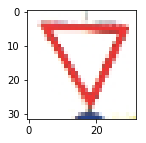


Sign Class 2:


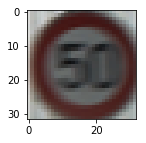


Sign Class 37:


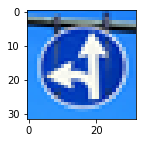


Sign Class 0:


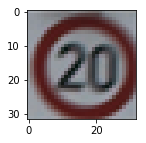


Sign Class 20:


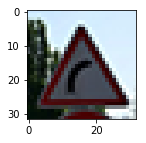

In [17]:
### Load the Images and Plot them here.
### Feel free to use as many code cells as needed.
### NMK [2018-09-13]: Done.

from PIL import Image
# Visualizations will be shown in the Notebook.
%matplotlib inline

X_test_extra = []
y_test_extra = []

def ReadImageAndLoadDataset(image_file_path, class_label):
    img = Image.open(image_file_path)
    img = img.resize((32,32)) # Resize Image To Size Of Model Input.
    img = np.array(img)       # .bmp -> Image Data Array [32x32x3].
    # print(img.shape)
    # print(img)
    X_test_extra.append(img)
    y_test_extra.append(class_label)

ReadImageAndLoadDataset("../Traffic-Signs-Data--WWW/Yield.bmp",                    13)
ReadImageAndLoadDataset("../Traffic-Signs-Data--WWW/SpeedLimit--50kmph.bmp",        2)
ReadImageAndLoadDataset("../Traffic-Signs-Data--WWW/GoStraightOrLeft.bmp",         37)
ReadImageAndLoadDataset("../Traffic-Signs-Data--WWW/SpeedLimit--20kmph.bmp",        0)
ReadImageAndLoadDataset("../Traffic-Signs-Data--WWW/DangerousCurveToTheRight.bmp", 20)

assert(len(X_test_extra) == len(y_test_extra))

i=0
for image in X_test_extra:
    print("Sign Class {}:".format(y_test_extra[i]))
    i += 1
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.show()
    print()


### Predict the Sign Type for Each Image

In [18]:
### Run the Predictions here and Use the Model to Output the Prediction For Each Image.
### Make sure to Pre-Process the Images with the Same Pre-Processing Pipeline used Earlier.
### Feel free to use as many code cells as needed.
### NMK [2018-09-13]: Done.


In [19]:
### Pre-Process the Data here. It is required to Normalize the Data.

### Quick Normalization:
# For Color Image:
Xmin = 0
Xmax = 255

X_test_extra = QuickNormalize(X_test_extra, Xmax)
# print(X_test_extra[0].shape)
# print(X_test_extra[0])


INFO:tensorflow:Restoring parameters from ./LeNet5_Model

Generating Predictions From Model For the Extra Test Dataset...

Image 1:
Prediction: Class 13


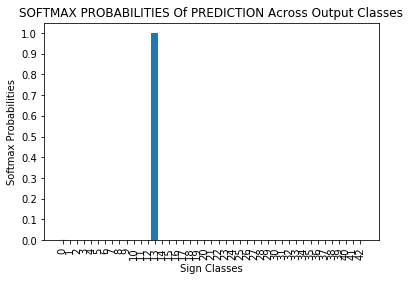


Image 2:
Prediction: Class 2


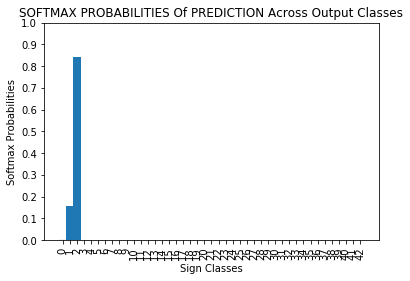


Image 3:
Prediction: Class 37


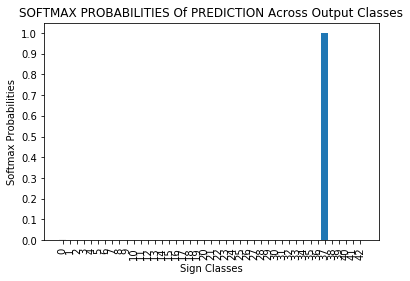


Image 4:
Prediction: Class 0


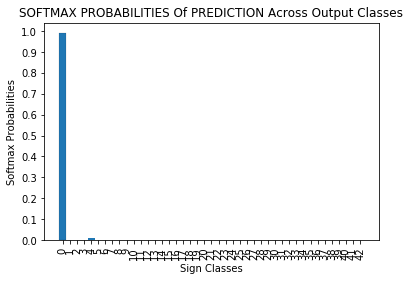


Image 5:
Prediction: Class 20


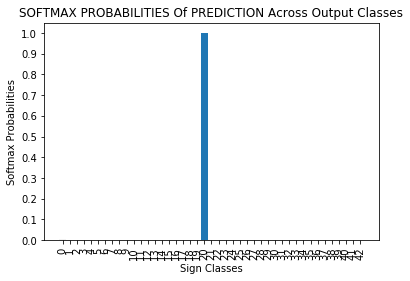

In [20]:
### Run the Predictions using the Model for the Extra Test Dataset.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print()
    print("Generating Predictions From Model For the Extra Test Dataset...")
    print()
    prediction_out, prediction_softmax_out = Prediction(X_test_extra)
    
    i=0
    for image in X_test_extra:
        ### Print out Prediction:
        print("Image {}:".format(i+1))
        print("Prediction: Class {}".format(prediction_out[i]))
        ### Plot Softmax Probabilities of Prediction:
        # print("Prediction Softmax:")
        # print(prediction_softmax_out[i])
        plot_bar_width = 1
        edgecolor      = 'black'
        linewidth      = 0.1
        plot_indx_x    = trn_unique_classes
        plot_softmax   = plt.bar(plot_indx_x, prediction_softmax_out[i], plot_bar_width, bottom=0, edgecolor=edgecolor, linewidth=linewidth)
        plt.title('SOFTMAX PROBABILITIES Of PREDICTION Across Output Classes')
        plt.xlabel('Sign Classes')
        plt.ylabel('Softmax Probabilities')
        plot_indx_x_max = np.max(trn_unique_classes)
        # plt.xticks(trn_unique_classes)
        plt.xticks(np.arange(0, plot_indx_x_max+1, 1), rotation=90)
        plot_indx_y_max = 1.0
        plt.yticks(np.arange(0, plot_indx_y_max+0.1, 0.1))
        plt.show()
        print()
        i += 1


### Analyze Performance

In [21]:
### Calculate the Accuracy for these 5 New Images.
### For Example, If the Model Predicted 1 out of 5 Signs Correctly, it's 20% Accurate on these New Images.
### NMK [2018-09-13]: Done.

prediction_correctness = np.equal(prediction_out, y_test_extra)
accuracy_of_operation  = np.mean(prediction_correctness)

print("Input-wise Prediction Correctness: ", prediction_correctness)
print("Overall Accuracy of Prediction   :  {}%".format((accuracy_of_operation/1)*100))


Input-wise Prediction Correctness:  [ True  True  True  True  True]
Overall Accuracy of Prediction   :  100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Print out the Top Five Softmax Probabilities For the Predictions on the German Traffic Sign Images found on the Web.
### Feel free to use as many code cells as needed.
### NMK [2018-09-13]: Done.

# Array holding the Softmax Probabilities of the Predictions:
# print("Input-wise Prediction Softmax Probabilities:")
# print(prediction_softmax_out)

# Input-wise Top 5 Softmax Probabilities:
with tf.Session() as sess:
    Top5Softmaxes = sess.run(tf.nn.top_k(tf.constant(prediction_softmax_out), k=5))
    print("Top 5 Softmax Probabilities For the Predictions on the German Traffic Sign Images found on the Web:")
    print(Top5Softmaxes)


Top 5 Softmax Probabilities For the Predictions on the German Traffic Sign Images found on the Web:
TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  8.41961741e-01,   1.58038273e-01,   3.13639745e-08,
          1.60696068e-09,   8.02885647e-10],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.91114616e-01,   8.88536964e-03,   1.19732688e-18,
          1.94118286e-29,   1.61825342e-30],
       [  1.00000000e+00,   4.52873583e-26,   4.30593242e-33,
          1.01340694e-36,   4.07336024e-38]], dtype=float32), indices=array([[13,  0,  1,  2,  3],
       [ 2,  1,  8,  4,  5],
       [37,  0,  1,  2,  3],
       [ 0,  4,  1,  8,  5],
       [20, 25, 24, 10,  5]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./LeNet5_Model
Input Image 1 [Size: 32 x 32]: Speed Limit Sign - Red Circle With Content


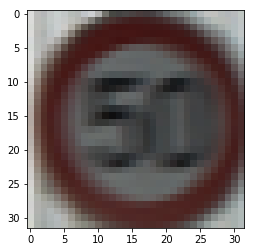

Feature Maps in Convolution Layer 1 [Output Size: 28 x 28]:


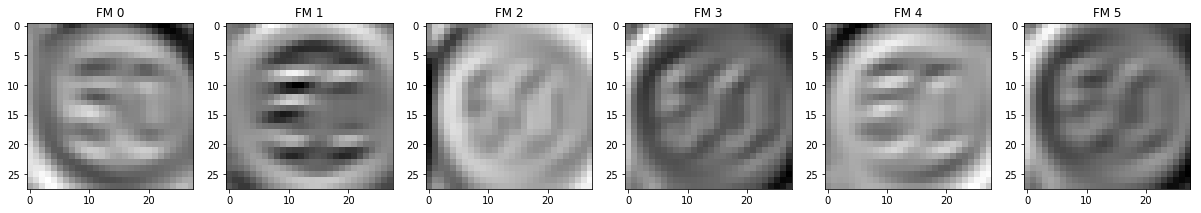

Feature Maps in Convolution Layer 2 [Output Size: 10 x 10]:


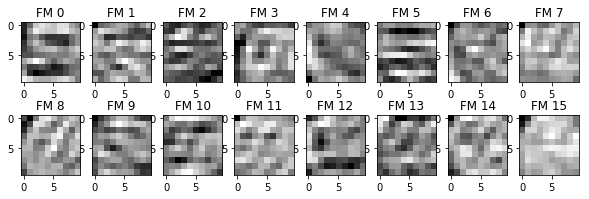

Input Image 2 [Size: 32 x 32]: No Through Road Sign - Red Circle WithOUT Content


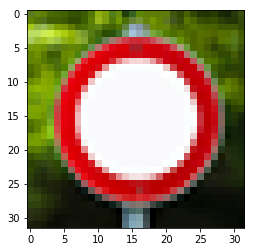

Feature Maps in Convolution Layer 1 [Output Size: 28 x 28]:


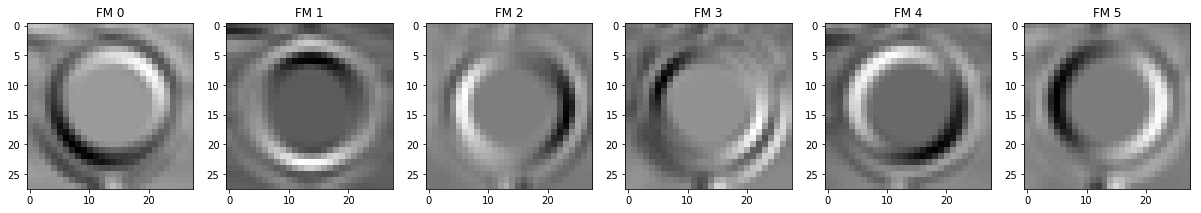

Feature Maps in Convolution Layer 2 [Output Size: 10 x 10]:


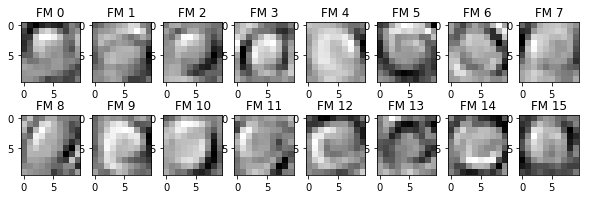

In [23]:
### Visualize your Network's Feature Maps here.
### Feel free to use as many code cells as needed.
### NMK [2018-09-14]: Done.

# image_input        : The Test Image being fed Into the Network To Produce the Feature Maps.
# tf_activation      : Should be a tf Variable Name Used During your Training Procedure
#                      that Represents the Calculated State of a Specific Weight Layer.
# activation_min/max : Can be used to View the Activation Contrast in More Detail,
#                      By Default matplot Sets min and max to the Actual min and max Values of the Output.
# plt_num            : Used to Plot out Multiple Different Weight Feature Map Sets On the Same Block,
#                      just Extend the Plot Number For Each New Feature Map Entry.

X_NNAnalyze_input = []

def OutputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1,
                     plt_num=1, plt_size=10):
    # Note: X should be the Same Name as your Network's Tensorflow Data Placeholder Variable.
    # If you get an Error tf_activation is Not Defined,
    # it may be having Trouble Accessing the Variable From Inside a Function.
    activation  = tf_activation.eval(session=sess, feed_dict={X: image_input})
    featuremaps = activation.shape[3]
    
    plt.figure(plt_num, figsize=(plt_size,plt_size))
    for featuremap in range(featuremaps):
        plt.subplot(6, 8, featuremap+1)    # Sets the Number of Feature Maps To Show On Each Row And Column.
        plt.title('FM ' + str(featuremap)) # Displays the Feature Map Number.
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

def ImagePreProc(img):
    ### Pre-Process Input Image:
    # Here make sure to Pre-Process your Input Image in a Way your Network Expects
    # with Size, Normalization, etc. if needed.
    ## Resize:
    img = img.resize((32,32)) # Resize Image To Size Of Model Input.
    img = np.array(img)       # .bmp -> Image Data Array [32x32x3].
    ## Quick Normalization:
    # For Color Image:
    Xmin = 0
    Xmax = 255
    img_out = QuickNormalize(img, Xmax)
    return(img_out)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    ### Visualize Network's Feature Maps -- Image 1:
    img              = Image.open("../Traffic-Signs-Data--WWW/SpeedLimit--50kmph.bmp")
    img_preprocessed = ImagePreProc(img)
    X_NNAnalyze_input.append(img_preprocessed)
    print("Input Image 1 [Size: 32 x 32]: Speed Limit Sign - Red Circle With Content")
    plt.imshow(img)
    plt.show()
    print("Feature Maps in Convolution Layer 1 [Output Size: 28 x 28]:")
    OutputFeatureMap(X_NNAnalyze_input, LeNet5.Conv1, plt_num=1, plt_size=28)
    plt.show()
    print("Feature Maps in Convolution Layer 2 [Output Size: 10 x 10]:")
    OutputFeatureMap(X_NNAnalyze_input, LeNet5.Conv2, plt_num=2, plt_size=10)
    plt.show()
    
    ### Visualize Network's Feature Maps -- Image 2:
    img              = Image.open("../Traffic-Signs-Data--WWW/NoThroughRoad.bmp")
    img_preprocessed = ImagePreProc(img)
    X_NNAnalyze_input.pop()
    X_NNAnalyze_input.append(img_preprocessed)
    print("Input Image 2 [Size: 32 x 32]: No Through Road Sign - Red Circle WithOUT Content")
    plt.imshow(img)
    plt.show()
    print("Feature Maps in Convolution Layer 1 [Output Size: 28 x 28]:")
    OutputFeatureMap(X_NNAnalyze_input, LeNet5.Conv1, plt_num=1, plt_size=28)
    plt.show()
    print("Feature Maps in Convolution Layer 2 [Output Size: 10 x 10]:")
    OutputFeatureMap(X_NNAnalyze_input, LeNet5.Conv2, plt_num=2, plt_size=10)
    plt.show()
